# PART 4 : Vehicle Exploratory Data Analysis (EDA)

In this section, we will make sure to gain valuable insights from our dataset used to make data-driven decision. The Visualisation here will be static in nature, so make sure to check out Business Intelligence system for Conclusive decisions. We need to make sure that we maintain data quality and integrity. First we will preview our dataset. 

In [1]:
# To inspect the dataset 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv("cleaned_vehicle_test_logs.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,vehicle_id,propulsion_type,test_scenario,vehicle_speed_mph,acceleration_mphps,engine_rpm,torque,coolant_temp,ambient_temp,power_kw,phase,soc,source_file
0,2025-08-11 21:02:06.665331,V001,EV,Cold Start,0.0,0.0,500.0,99.49,39.87,29.089257,5.21,Idle,99.99,V001_Cold_Start.csv
1,2025-08-11 21:02:07.665331,V001,EV,Cold Start,0.0,0.0,500.0,98.36,39.89,29.086131,5.15,Idle,100.00,V001_Cold_Start.csv
2,2025-08-11 21:02:08.665331,V001,EV,Cold Start,0.0,0.0,500.0,118.50,39.91,29.093595,6.20,Idle,100.00,V001_Cold_Start.csv
3,2025-08-11 21:02:09.665331,V001,EV,Cold Start,0.0,0.0,500.0,108.82,39.93,29.105409,5.70,Idle,100.00,V001_Cold_Start.csv
4,2025-08-11 21:02:10.665331,V001,EV,Cold Start,0.0,0.0,500.0,123.97,39.95,29.106028,6.49,Idle,99.89,V001_Cold_Start.csv


In [2]:
# First, we have a look at rows and columns
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Data types
df.dtypes

# Check the count for unique vehicle IDs and scenarios
print(df['vehicle_id'].unique())
print(df['test_scenario'].value_counts())


Shape: (74700, 14)
Columns: ['timestamp', 'vehicle_id', 'propulsion_type', 'test_scenario', 'vehicle_speed_mph', 'acceleration_mphps', 'engine_rpm', 'torque', 'coolant_temp', 'ambient_temp', 'power_kw', 'phase', 'soc', 'source_file']
['V001' 'V002' 'V003' 'V004' 'V005']
test_scenario
Cold Start       23820
High Speed       18480
Hill Climb       17820
Endurance Run    14580
Name: count, dtype: int64


In [3]:
# A quick analysis about the data schema and the description

df.describe(include='all')


,timestamp,vehicle_id,propulsion_type,test_scenario,vehicle_speed_mph,acceleration_mphps,engine_rpm,torque,coolant_temp,ambient_temp,power_kw,phase,soc,source_file
count,74700,74700,74700,74700,74700.000000,74700.000000,74700.000000,74700.000000,74700.000000,74700.000000,74700.000000,74700,43860.000000,74700
unique,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,20
top,NaN,V005,EV,Cold Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accelerate,NaN,V004_Cold_Start.csv
freq,NaN,16740,43860,23820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24536,NaN,5280
mean,2025-08-11 21:36:05.295441152,NaN,NaN,NaN,45.973288,0.006520,1832.008014,184.232586,53.140287,24.053795,40.095513,NaN,89.997231,NaN
min,2025-08-11 21:02:06.665331,NaN,NaN,NaN,0.000000,-12.480000,500.000000,0.310000,20.300000,13.349559,0.030000,NaN,79.190000,NaN
25%,2025-08-11 21:17:40.259667200,NaN,NaN,NaN,25.980000,-0.840000,799.237500,113.487500,45.930000,19.424089,8.310000,NaN,85.010000,NaN
50%,2025-08-11 21:33:14.920442368,NaN,NaN,NaN,30.790000,0.020000,1235.375000,205.890000,57.150000,23.149694,32.110000,NaN,90.010000,NaN
75%,2025-08-11 21:53:09.516344320,NaN,NaN,NaN,74.380000,0.860000,2929.807500,241.210000,57.150000,29.069380,65.632500,NaN,94.980000,NaN
max,2025-08-11 22:30:06.154896,NaN,NaN,NaN,112.010000,10.550000,5150.880000,374.790000,70.000000,35.783794,163.880000,NaN,100.000000,NaN


In [4]:
# Summary count of all test runs for all vehicles 
summary = df.groupby(['vehicle_id', 'test_scenario'])['timestamp'].count().unstack()
print(summary)


test_scenario  Cold Start  Endurance Run  High Speed  Hill Climb
vehicle_id                                                      
V001                 4620           1920        1860        4080
V002                 5100           2040        4140        3840
V003                 4200           2400        3420        4620
V004                 5280           3420        5160        1860
V005                 4620           4800        3900        3420


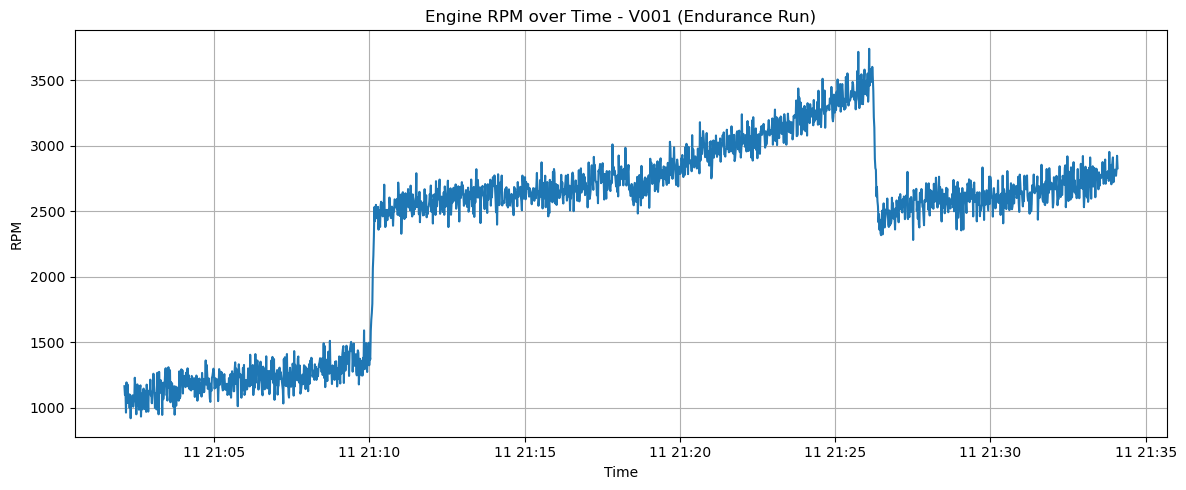

In [5]:
# Here, we will take an example visual showcase of Rotation per minute (RPM); can be customisable 

v = 'V001'                                       # Change -> 'V002','V003','V004' or 'V005'
scenario = 'Endurance Run'                       # Change ->  'Hill Climb', 'Cold Start' or 'High Speed'

subset = df[(df['vehicle_id'] == v) & (df['test_scenario'] == scenario)]

plt.figure(figsize=(12, 5))
plt.plot(subset['timestamp'], subset['engine_rpm'])
plt.title(f'Engine RPM over Time - {v} ({scenario})')
plt.xlabel("Time")
plt.ylabel("RPM")
plt.grid(True)
plt.tight_layout()
plt.show()


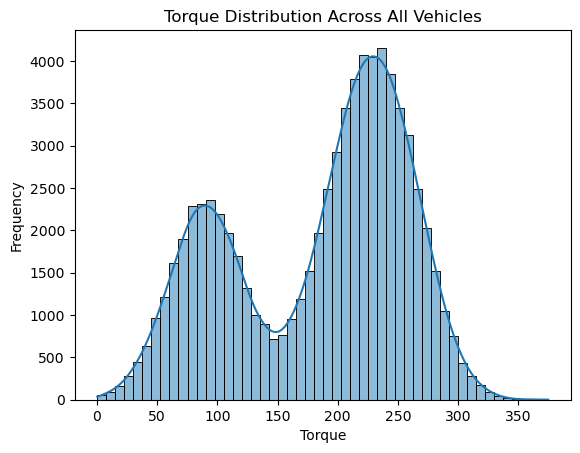

In [6]:
# Distribution analysis of the torque values in the vehicle dataset.

sns.histplot(df['torque'].dropna(), bins=50, kde=True)
plt.title("Torque Distribution Across All Vehicles")
plt.xlabel("Torque")
plt.ylabel("Frequency")
plt.show()


We need to define overheating threshold as Coolant_Temperature have defined set of temperatures :
    - If between 90 degrees to 104 degrees, it's considered normal
    - Anything above the 104 degree threshold is considered overheating

In [7]:
# Defining overheat threshold
overheat_threshold = 70  # degrees

# Filter rows where coolant temperature exceeds threshold
overheat_df = df[df['coolant_temp'] > overheat_threshold]

# Summary
print("Total Overheat Events:", len(overheat_df))
print("\nOverheat Events by Vehicle:")
print(overheat_df['vehicle_id'].value_counts())

Total Overheat Events: 0

Overheat Events by Vehicle:
Series([], Name: count, dtype: int64)


In [8]:
# Define torque dropout threshold (e.g. near zero during motion)
dropout_df = df[(df['torque'] < 20) & (df['vehicle_speed_mph'] > 5)]
print("Torque Dropouts Detected:", len(dropout_df))

# Show sample
dropout_df[['timestamp', 'vehicle_id', 'torque', 'vehicle_speed_mph']].head()

# Note : This just a check, it will be considered as anamoly if its below 20 for more than 3 seconds

Torque Dropouts Detected: 215


,timestamp,vehicle_id,torque,vehicle_speed_mph
764,2025-08-11 21:14:50.665331,V001,12.15,8.99
819,2025-08-11 21:15:45.665331,V001,12.06,10.00
1062,2025-08-11 21:19:48.665331,V001,11.77,14.48
1096,2025-08-11 21:20:22.665331,V001,13.02,15.11
1172,2025-08-11 21:21:38.665331,V001,11.50,16.51


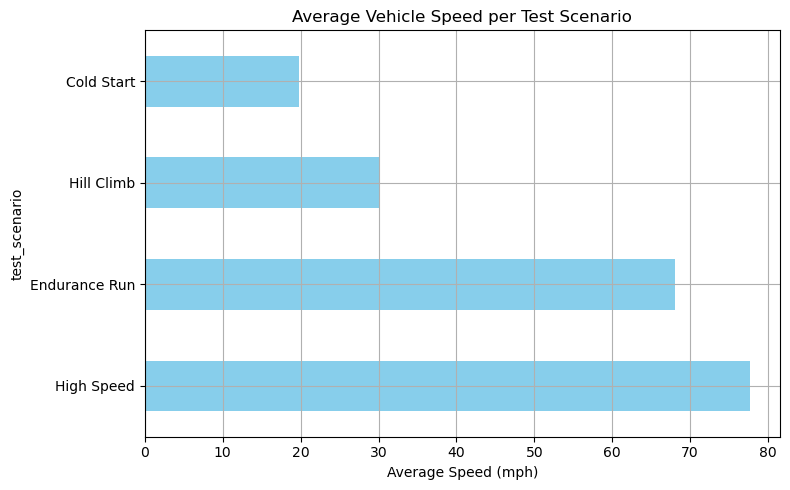

In [9]:
# Checking the Average Speed of all the vehicles in miles per hour 
avg_speed = df.groupby('test_scenario')['vehicle_speed_mph'].mean().sort_values(ascending=False)

# Plotting speed of vehicle in different test scenarios

plt.figure(figsize=(8, 5))
avg_speed.plot(kind='barh', color='skyblue')
plt.xlabel("Average Speed (mph)")
plt.title("Average Vehicle Speed per Test Scenario")
plt.grid(True)
plt.tight_layout()
plt.show()


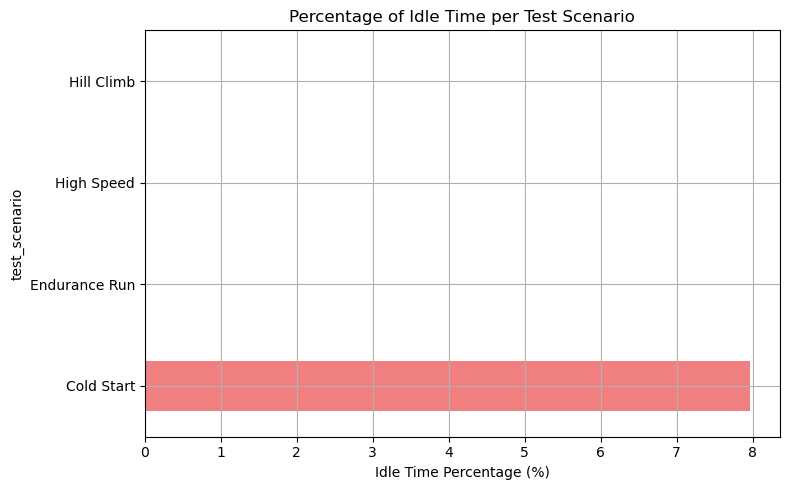

In [10]:
# Marking idle where speed < 1 mph
df['is_idle'] = df['vehicle_speed_mph'] < 1

# Calculating idle percentage per test
idle_percent = df.groupby('test_scenario')['is_idle'].mean() * 100

# Plotting the Time the vehicle was idle during test scenario
plt.figure(figsize=(8, 5))
idle_percent.plot(kind='barh', color='lightcoral')
plt.xlabel("Idle Time Percentage (%)")
plt.title("Percentage of Idle Time per Test Scenario")
plt.grid(True)
plt.tight_layout()
plt.show()


There are scenarios where there is sudden acceleration or breaking in this simulated dataset, we can check in which test scenario did this tend to happen more 

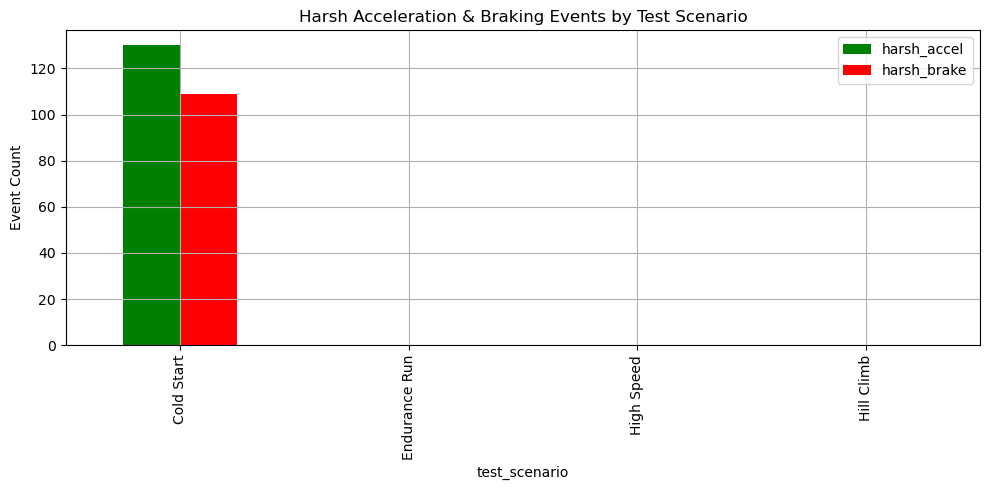

In [11]:
# Define harsh acceleration & braking
df['harsh_accel'] = df['acceleration_mphps'] > 6.7
df['harsh_brake'] = df['acceleration_mphps'] < -7

# Count events by scenario
harsh_events = df.groupby('test_scenario')[['harsh_accel', 'harsh_brake']].sum()

# Plotting the event 
harsh_events.plot(kind='bar', figsize=(10, 5), color=['green', 'red'])
plt.title("Harsh Acceleration & Braking Events by Test Scenario")
plt.ylabel("Event Count")
plt.grid(True)
plt.tight_layout()
plt.show()


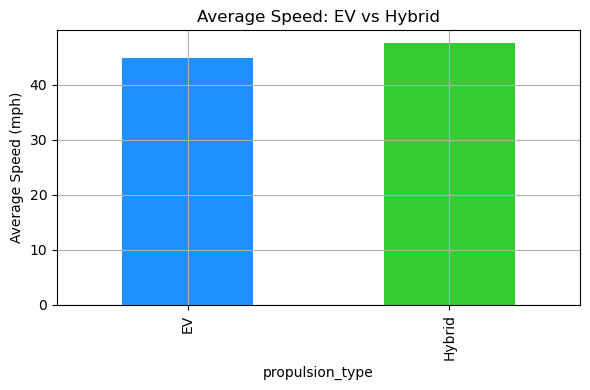

In [12]:
# Grouping Average speed comparsion between EV vs HYBRID 
avg_speed = df.groupby('propulsion_type')['vehicle_speed_mph'].mean()

avg_speed.plot(kind='bar', color=['dodgerblue', 'limegreen'], figsize=(6, 4))
plt.ylabel("Average Speed (mph)")
plt.title("Average Speed: EV vs Hybrid")
plt.grid(True)
plt.tight_layout()
plt.show()


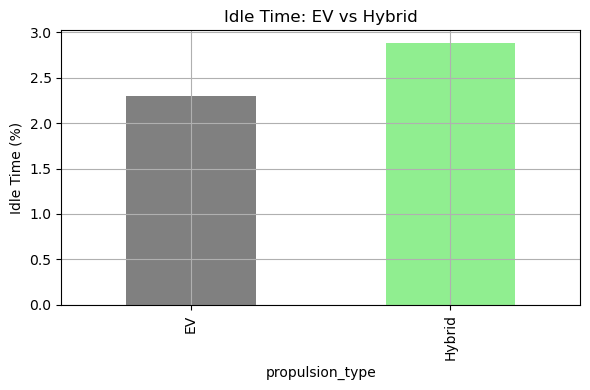

In [13]:
# Comparsion between time on how long the vehicle was idle b/w EV and HYBRID
df['is_idle'] = df['vehicle_speed_mph'] < 1

idle_percent = df.groupby('propulsion_type')['is_idle'].mean() * 100

idle_percent.plot(kind='bar', color=['grey', 'lightgreen'], figsize=(6, 4))
plt.ylabel("Idle Time (%)")
plt.title("Idle Time: EV vs Hybrid")
plt.grid(True)
plt.tight_layout()
plt.show()


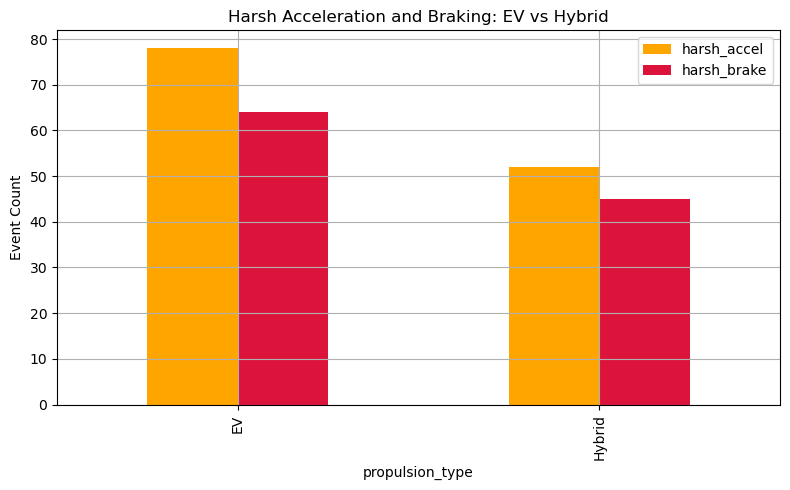

In [14]:
# Comparsion of harsh acceleration and braking b/w EVs and HYBRID 
df['harsh_accel'] = df['acceleration_mphps'] > 6.7
df['harsh_brake'] = df['acceleration_mphps'] < -7

harsh_events = df.groupby('propulsion_type')[['harsh_accel', 'harsh_brake']].sum()

harsh_events.plot(kind='bar', color=['orange', 'crimson'], figsize=(8, 5))
plt.ylabel("Event Count")
plt.title("Harsh Acceleration and Braking: EV vs Hybrid")
plt.grid(True)
plt.tight_layout()
plt.show()


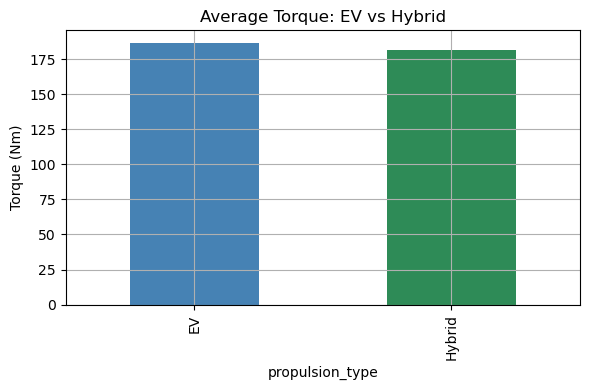

In [15]:
# Mean comparsion of Torque between EVs and HYBRID 
df.groupby('propulsion_type')['torque'].mean().plot(
    kind='bar', color=['steelblue', 'seagreen'], figsize=(6, 4)
)
plt.title("Average Torque: EV vs Hybrid")
plt.ylabel("Torque (Nm)")
plt.grid(True)
plt.tight_layout()
plt.show()


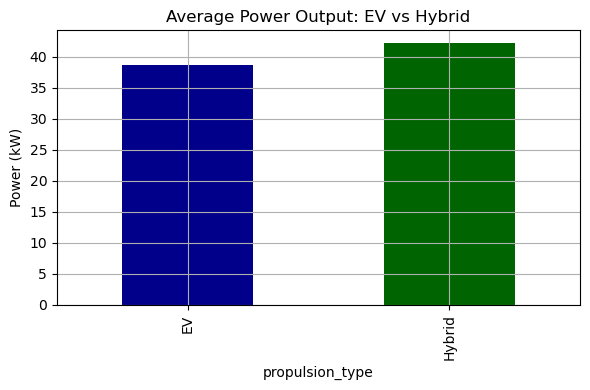

In [16]:
# Average comparsion of Power Output between EVs and HYBRID 
df.groupby('propulsion_type')['power_kw'].mean().plot(
    kind='bar', color=['darkblue', 'darkgreen'], figsize=(6, 4)
)
plt.title("Average Power Output: EV vs Hybrid")
plt.ylabel("Power (kW)")
plt.grid(True)
plt.tight_layout()
plt.show()


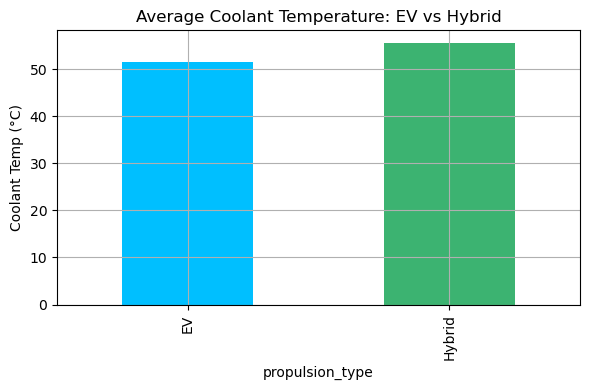

In [17]:
# Average comparsion of Coolant Temperature between EVs and HYBRID 
df.groupby('propulsion_type')['coolant_temp'].mean().plot(
    kind='bar', color=['deepskyblue', 'mediumseagreen'], figsize=(6, 4)
)
plt.title("Average Coolant Temperature: EV vs Hybrid")
plt.ylabel("Coolant Temp (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# A quick summary of Average torque, power_kw and coolant_temp
summary = df.groupby('propulsion_type')[['torque', 'power_kw', 'coolant_temp']].mean().round(2)
print(summary)


                 torque  power_kw  coolant_temp
propulsion_type                                
EV               186.32     38.66         51.53
Hybrid           181.26     42.14         55.43


In [19]:
# A quick summary of maximum amount torque, power_kw and coolant_temp
summary = df.groupby('propulsion_type')[['torque', 'power_kw', 'coolant_temp']].max().round(2)
print(summary)


                 torque  power_kw  coolant_temp
propulsion_type                                
EV               374.79    161.08          58.0
Hybrid           367.03    163.88          70.0


In [20]:
# A quick summary of minimum amount torque, power_kw and coolant_temp
summary = df.groupby('propulsion_type')[['torque', 'power_kw', 'coolant_temp']].min().round(2)
print(summary)


                 torque  power_kw  coolant_temp
propulsion_type                                
EV                 0.31      0.03         21.17
Hybrid             0.35      0.03         20.30


Next step involves checking the correlation between the Data which will be used for modelling purposes in the next part. This helps to understand the correlation between each data points and how much impact it can create in modelling process. 

In [21]:
# Selecting the relevant numerical data 
features = ['vehicle_speed_mph', 'acceleration_mphps', 'engine_rpm', 'torque', 'power_kw', 'coolant_temp']

# Splitting by propulsion type
ev_df = df[df['propulsion_type'] == 'EV'][features].dropna()
hybrid_df = df[df['propulsion_type'] == 'Hybrid'][features].dropna()


C:\Users\asadh\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from current font.
  fig.canvas.draw()
C:\Users\asadh\AppData\Local\Temp\ipykernel_27736\2399381238.py:21: UserWarning: Glyph 9981 (\N{FUEL PUMP}) missing from current font.
  plt.tight_layout()
C:\Users\asadh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\asadh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9981 (\N{FUEL PUMP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


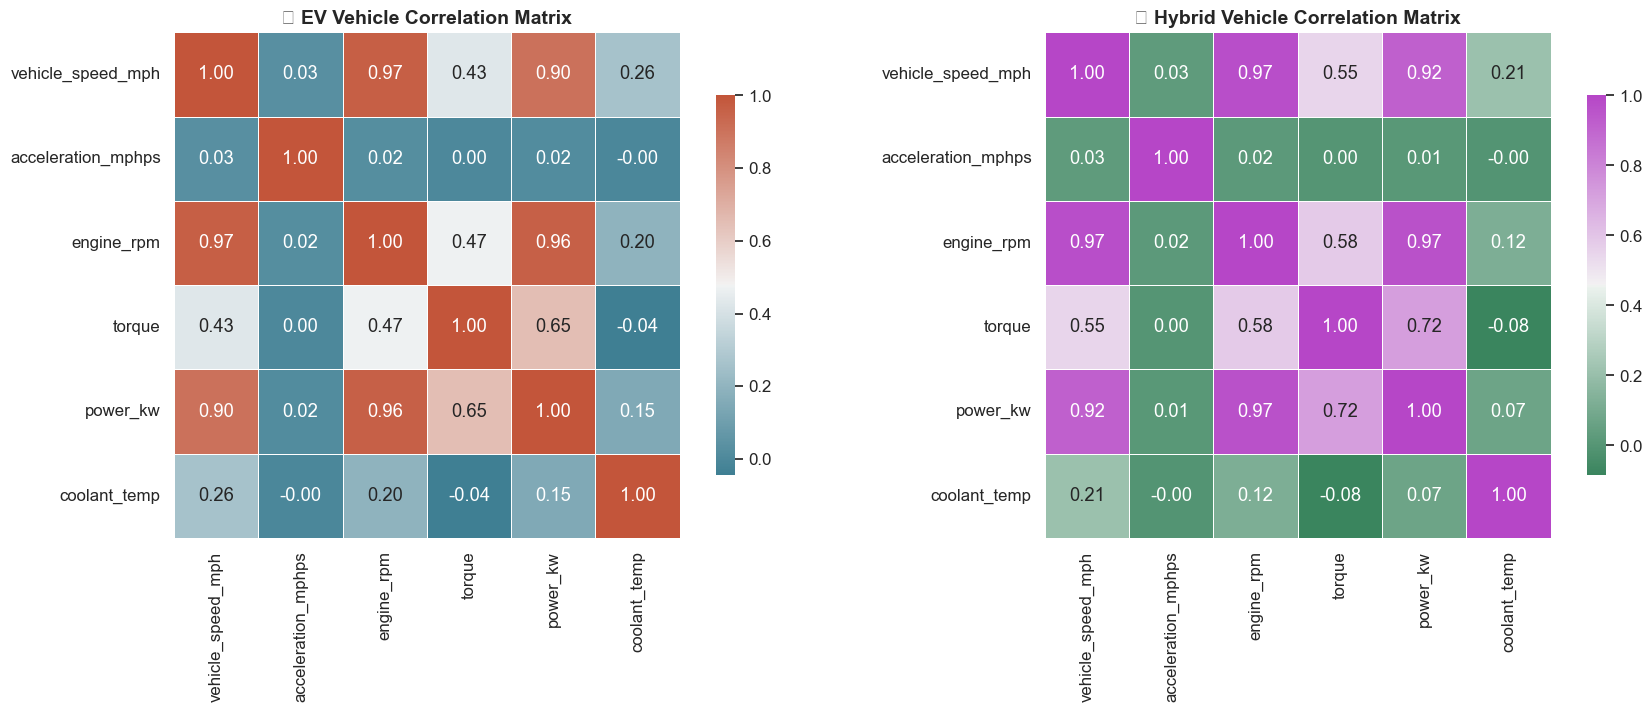

In [22]:
# Visualing the heatmap correlation
# Setting a better theme
sns.set(style="white", font_scale=1.1)

# Creating the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Selecting Color palettes
cmap_ev = sns.diverging_palette(220, 20, as_cmap=True)
cmap_hybrid = sns.diverging_palette(145, 300, as_cmap=True)

# EV Correlation
sns.heatmap(ev_df.corr(), ax=axes[0], annot=True, fmt='.2f', cmap=cmap_ev, square=True, linewidths=0.5, cbar_kws={"shrink": .75})
axes[0].set_title("🔌 EV Vehicle Correlation Matrix", fontsize=14, weight='bold')

# HYBRID Correlation
sns.heatmap(hybrid_df.corr(), ax=axes[1], annot=True, fmt='.2f', cmap=cmap_hybrid, square=True, linewidths=0.5, cbar_kws={"shrink": .75})
axes[1].set_title("⛽ Hybrid Vehicle Correlation Matrix", fontsize=14, weight='bold')

# Layout
plt.tight_layout()
plt.show()


In [23]:
# Checking for the strongest correlation in the dataset 

def get_top_correlations(df, label=""):
    # Computing  correlation matrix
    corr_matrix = df.corr().abs()

    # Masking self-correlations
    mask = ~np.eye(corr_matrix.shape[0], dtype=bool)
    corr_values = corr_matrix.where(mask).stack().reset_index()
    corr_values.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Sorting and getting the top 3
    top3 = corr_values.sort_values(by='Correlation', ascending=False).head(3)
    print(f"\n🔝 Top 3 Strongest Correlations - {label} Vehicles:")
    print(top3.to_string(index=False))

# Getting top 3 correlations for both
get_top_correlations(ev_df, "EV")
get_top_correlations(hybrid_df, "Hybrid")



🔝 Top 3 Strongest Correlations - EV Vehicles:
        Feature 1         Feature 2  Correlation
vehicle_speed_mph        engine_rpm     0.967349
       engine_rpm vehicle_speed_mph     0.967349
         power_kw        engine_rpm     0.959722

🔝 Top 3 Strongest Correlations - Hybrid Vehicles:
        Feature 1         Feature 2  Correlation
       engine_rpm vehicle_speed_mph     0.970591
vehicle_speed_mph        engine_rpm     0.970591
       engine_rpm          power_kw     0.965992
